In [7]:
#!/usr/bin/env python3
# book_id, alpha release
# Copyright 2018, Dextro Labs

In [8]:
# import the serious stuff
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import sys # replace this with argparse

In [9]:
# preprocess the image
input_image = cv2.imread("sample_image.jpg")
height_ratio = input_image.shape[0] / 500
pre_image = imutils.resize(input_image, height = 500)

In [10]:
# detect edges
gray_image = cv2.cvtColor(pre_image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(gray_image, 75, 200)

In [11]:
# detect contours
contours = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

In [12]:
# find contours with four edges
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx_edges = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    
    if len(approx_edges) == 4:
        page_contour = approx_edges
        break

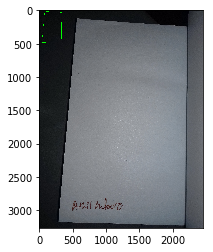

In [13]:
contour_image = cv2.drawContours(input_image, [contour], -1, (0, 255, 0), 2)
plt.imshow(contour_image)